## Import libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

## Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation image processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[102.    88.   123.  ]
   [ 93.    79.   114.  ]
   [102.5   88.5  123.5 ]
   ...
   [138.   129.   158.  ]
   [132.25 123.25 152.25]
   [123.5  114.5  143.5 ]]

  [[115.25 101.25 134.25]
   [125.25 111.25 144.25]
   [ 82.25  68.25 101.25]
   ...
   [132.75 123.75 152.75]
   [132.75 123.75 152.75]
   [132.25 123.25 152.25]]

  [[103.    89.   122.  ]
   [ 88.75  74.75 107.75]
   [113.    99.   132.  ]
   ...
   [126.   117.   146.  ]
   [134.   125.   154.  ]
   [143.25 134.25 163.25]]

  ...

  [[114.5  105.5  132.5 ]
   [115.5  106.5  133.5 ]
   [117.75 108.75 135.75]
   ...
   [159.75 154.75 177.75]
   [161.   156.   179.  ]
   [168.   163.   186.  ]]

  [[125.5  116.5  143.5 ]
   [125.5  116.5  143.5 ]
   [124.5  115.5  142.5 ]
   ...
   [165.75 160.75 183.75]
   [165.5  160.5  183.5 ]
   [168.25 163.25 186.25]]

  [[129.   120.   147.  ]
   [131.25 122.25 149.25]
   [131.75 122.75 149.75]
   ...
   [174.5  169.5  192.5 ]
   [176.5  171.5  194.5 ]
   [173.75 168.75 19

## Building model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model =  Sequential()

In [ ]:
## Building convulational layer

In [8]:
model.add(Conv2D(filters=32, kernel_size=3,padding = 'same',activation= 'relu' , input_shape= [128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3,activation= 'relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

C:\Users\Nikita Jagadale\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.add(Conv2D(filters=64, kernel_size=3,padding = 'same',activation= 'relu'))
model.add(Conv2D(filters=64, kernel_size=3,activation= 'relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters=128, kernel_size=3,padding = 'same',activation= 'relu' ))
model.add(Conv2D(filters=128, kernel_size=3,activation= 'relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=256, kernel_size=3,padding = 'same',activation= 'relu' ))
model.add(Conv2D(filters=256, kernel_size=3,activation= 'relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=512, kernel_size=3,padding = 'same',activation= 'relu' ))
model.add(Conv2D(filters=512, kernel_size=3,activation= 'relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation= 'relu'))


In [16]:
model.add(Dropout(0.4))

In [17]:
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [20]:
training_history=model.fit(x=training_set,validation_data=validation_set, epochs=3)

Epoch 1/3
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2844s 1s/step - accuracy: 0.3714 - loss: 2.2304 - val_accuracy: 0.8288 - val_loss: 0.5458
Epoch 2/3
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 9751s 4s/step - accuracy: 0.8377 - loss: 0.5063 - val_accuracy: 0.9091 - val_loss: 0.2915
Epoch 3/3
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4654s 2s/step - accuracy: 0.9069 - loss: 0.2864 - val_accuracy: 0.9221 - val_loss: 0.2429


## Model Evalution 

In [21]:
train_loss,train_acc= model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1420s 646ms/step - accuracy: 0.9421 - loss: 0.1824


In [22]:
print(train_loss,train_acc)

0.16462787985801697 0.94719398021698


In [23]:
val_loss,val_acc= model.evaluate(validation_set)


550/550 ━━━━━━━━━━━━━━━━━━━━ 269s 487ms/step - accuracy: 0.9199 - loss: 0.2472


In [24]:
print(val_loss,val_acc)

0.2428874969482422 0.9220919609069824


## saving model

In [26]:
model.save("trained_model.keras")

In [27]:
training_history.history

{'accuracy': [0.5817625522613525, 0.8609716296195984, 0.9163667559623718],
 'loss': [1.4198665618896484, 0.43399763107299805, 0.2567651569843292],
 'val_accuracy': [0.8288185596466064, 0.9090598821640015, 0.9220919609069824],
 'val_loss': [0.5457966327667236, 0.2914532423019409, 0.24288757145404816]}

In [28]:
##Recording history

In [29]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visulization

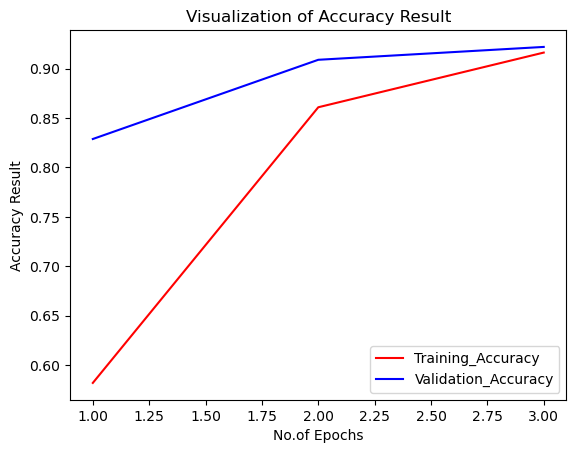

In [30]:
epochs = [i for i in range(1,4)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training_Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation_Accuracy')
plt.xlabel("No.of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## some other metrices for model Evaluation

In [31]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [32]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)

Found 17572 files belonging to 38 classes.


In [33]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 265s 479ms/step


(array([[9.9699509e-01, 3.3566728e-04, 5.2395271e-06, ..., 2.0119197e-08,
         1.1874026e-08, 6.1825318e-08],
        [9.9792993e-01, 1.9448475e-03, 1.1218345e-06, ..., 5.6653954e-10,
         3.7926298e-09, 3.4491887e-08],
        [9.9994791e-01, 2.3944531e-06, 5.0449700e-07, ..., 2.7191414e-11,
         5.2821483e-11, 1.3714035e-09],
        ...,
        [7.0032831e-07, 6.2262639e-09, 2.6848859e-06, ..., 8.2870004e-09,
         4.7059130e-09, 9.9959570e-01],
        [4.7656980e-05, 3.2302651e-07, 1.1335071e-05, ..., 8.1677433e-07,
         9.0048400e-07, 9.9793112e-01],
        [1.7583726e-08, 9.0139379e-10, 8.2385099e-10, ..., 4.0816558e-11,
         3.1422152e-09, 9.9998558e-01]], dtype=float32),
 (17572, 38))

In [34]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [36]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.82      0.89       504
                                 Apple___Black_rot       0.91      0.98      0.94       497
                          Apple___Cedar_apple_rust       0.84      0.99      0.91       440
                                   Apple___healthy       0.95      0.89      0.92       502
                               Blueberry___healthy       0.91      0.97      0.94       454
          Cherry_(including_sour)___Powdery_mildew       0.94      0.97      0.96       421
                 Cherry_(including_sour)___healthy       0.96      0.98      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.82      0.84       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.80      0.98      0.

In [39]:
cm = confusion_matrix(Y_true,predicted_categories )
cm.shape
cm

array([[414,  15,  10, ...,   0,   0,   0],
       [  0, 485,   1, ...,   0,   0,   0],
       [  0,   0, 435, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 483,   0,   0],
       [  0,   0,   0, ...,   0, 439,   0],
       [  3,   0,   2, ...,   0,   1, 460]], dtype=int64)

## Confusion Matrix visualizaion

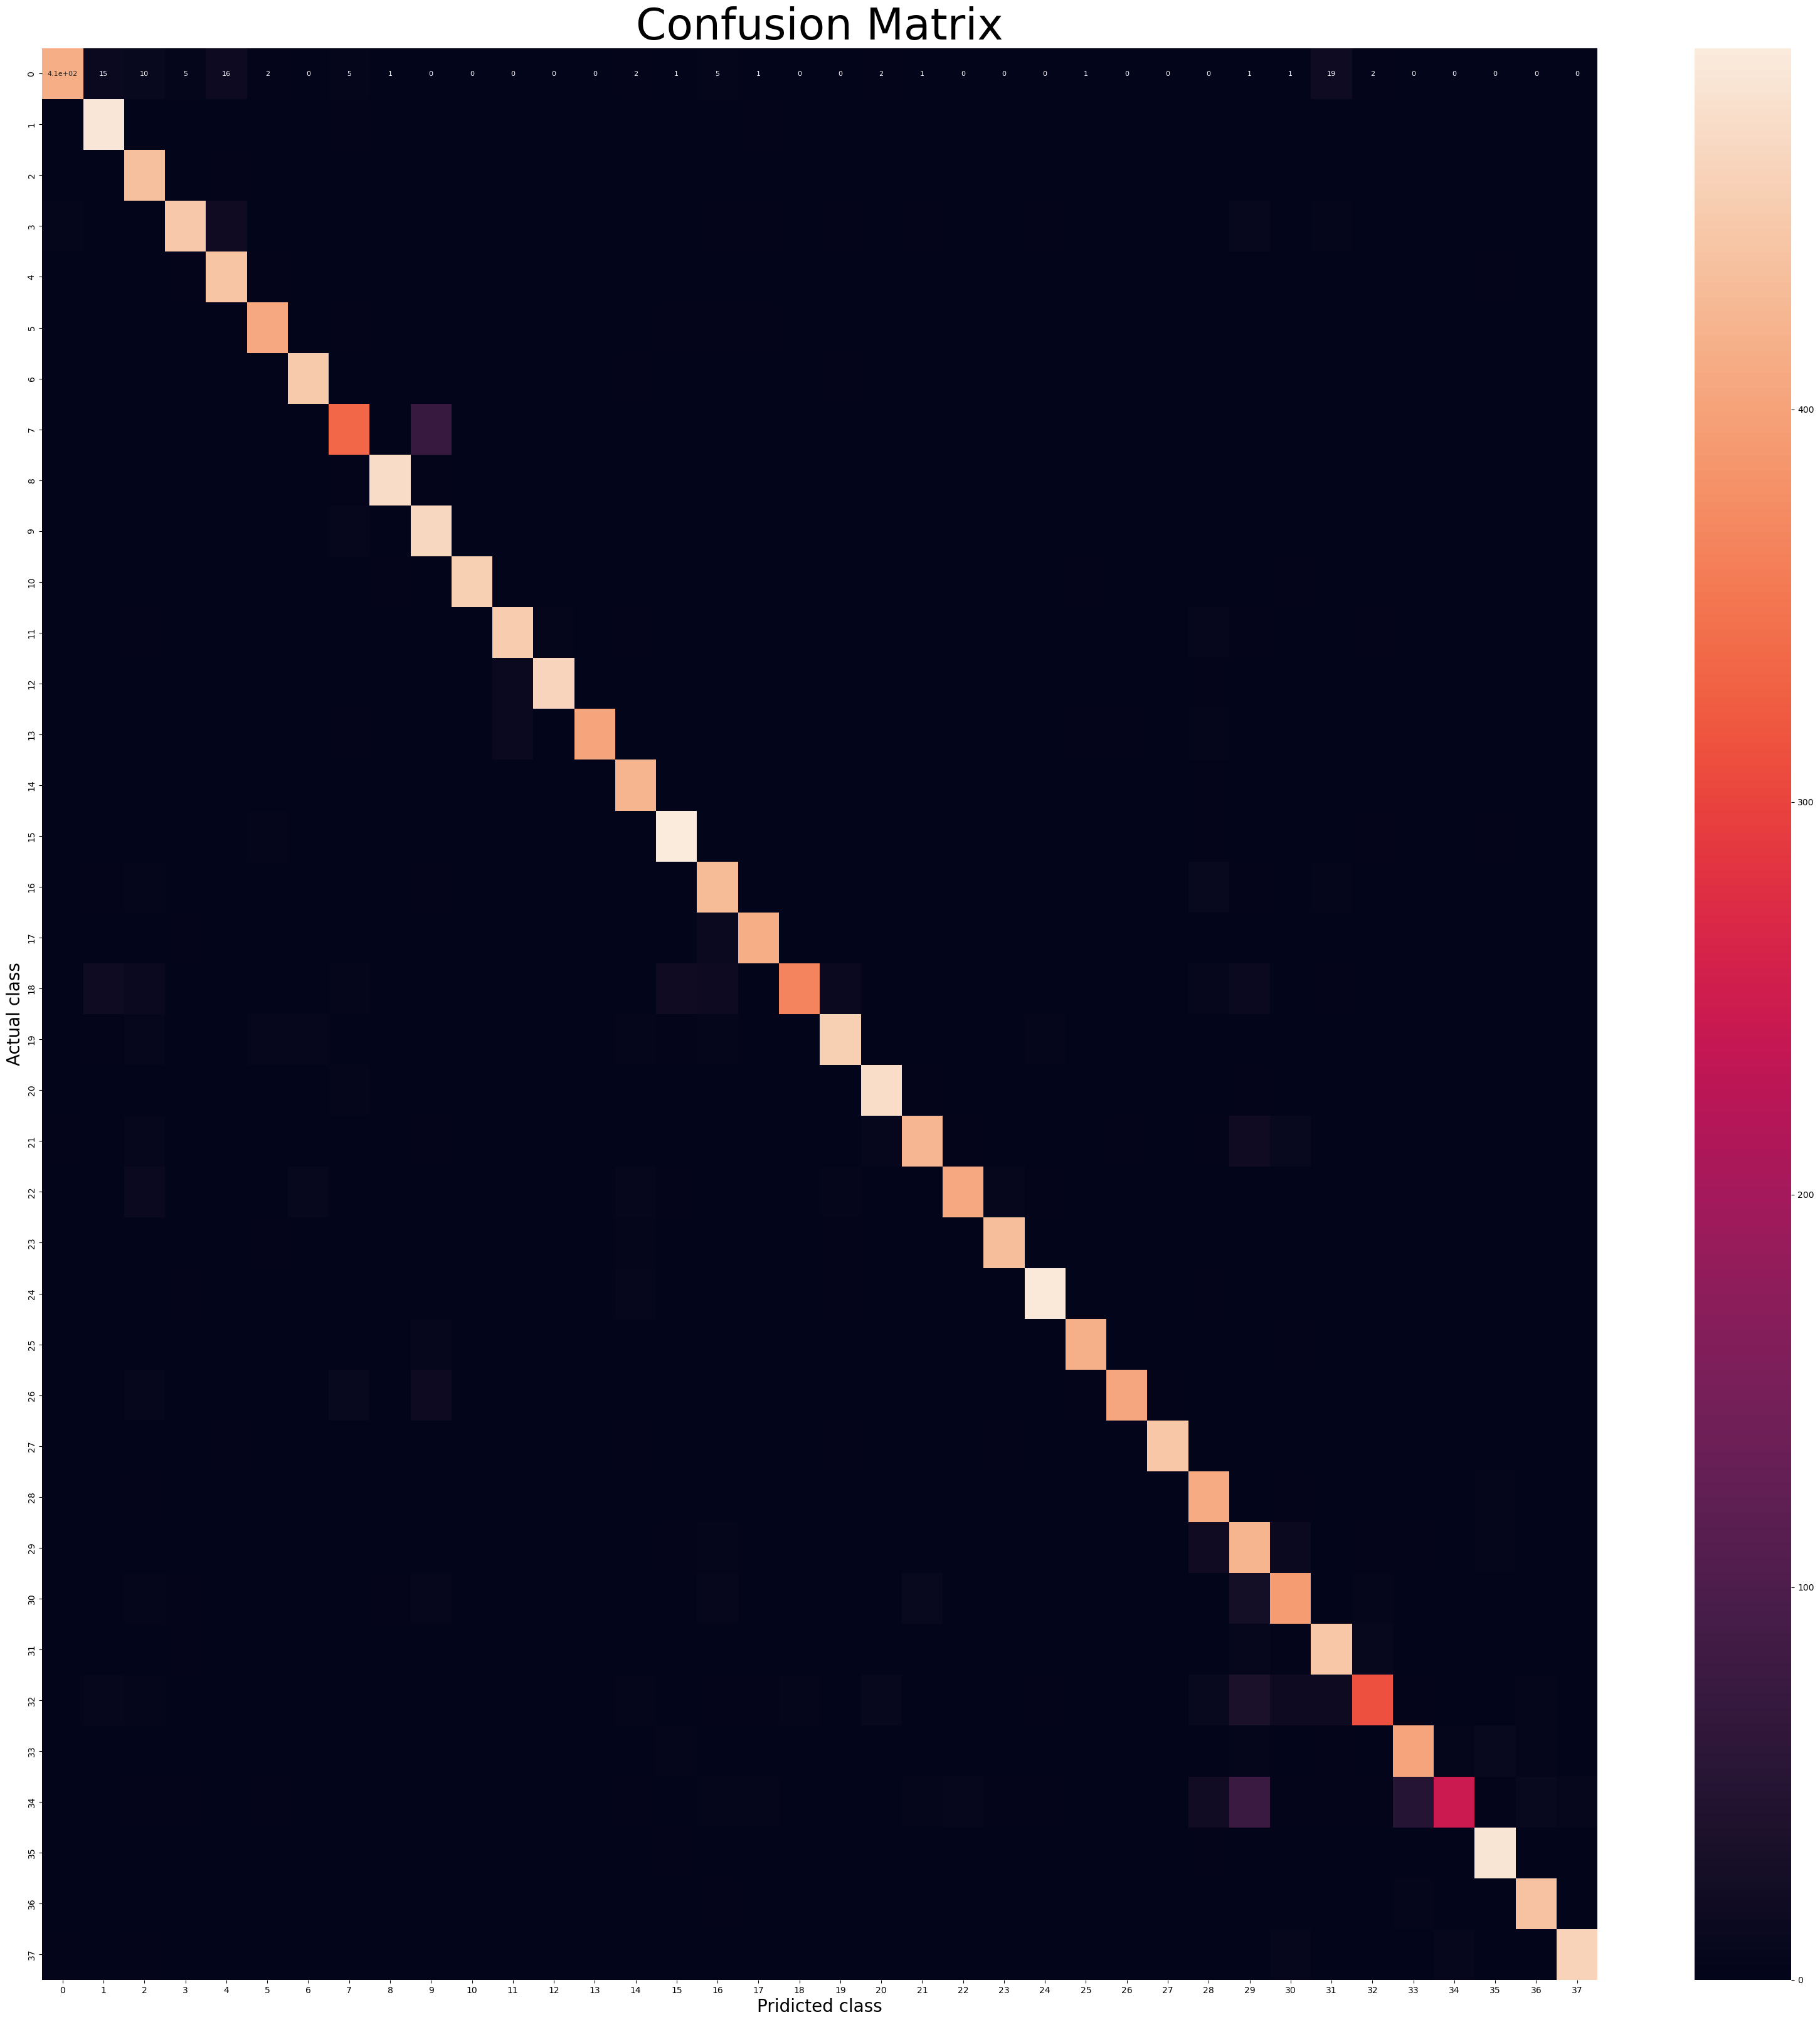

In [41]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':8})
plt.xlabel("Pridicted class",fontsize=20)
plt.ylabel("Actual class",fontsize=20)
plt.title("Confusion Matrix",fontsize=50)
plt.show()